<a href="https://colab.research.google.com/github/gigisy/ProjectML/blob/main/Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA PREPARATION**

## IMPORT LIBRARY

In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as ex
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


# Let's ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

## IMPORT DATASET

In [ ]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


# **DATA PRE-PROCESSING**

## Drop Kolom ID (tidak diperlukan)

In [ ]:
# Drop unnecessary columns
data = data.drop(['id'], axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Cek Kategori setiap Variabel Kategotik

In [ ]:
category_gender = data['gender'].value_counts()
category_gender

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [ ]:
# Menghilangkan kategori "Other"
data= data[data['gender'] != 'Other']
category_gender = data['gender'].value_counts()
category_gender

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [ ]:
category_work_type = data['work_type'].value_counts()
category_work_type

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [ ]:
category_married = data['ever_married'].value_counts()
category_married

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [ ]:
category_residence_type = data['Residence_type'].value_counts()
category_residence_type

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

In [ ]:
category_smoking = data['smoking_status'].value_counts()
category_smoking

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

## Cek Missing Value

In [ ]:
# MISSING VALUE
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Jumlah missing value di setiap kolom
missing_values = data.isna().sum()

# Oersentase missing value di setiap kolom
percentage_missing = (missing_values / len(data)) * 100
percentage_missing

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.934234
smoking_status       0.000000
stroke               0.000000
dtype: float64

## Imputasi Missing Value

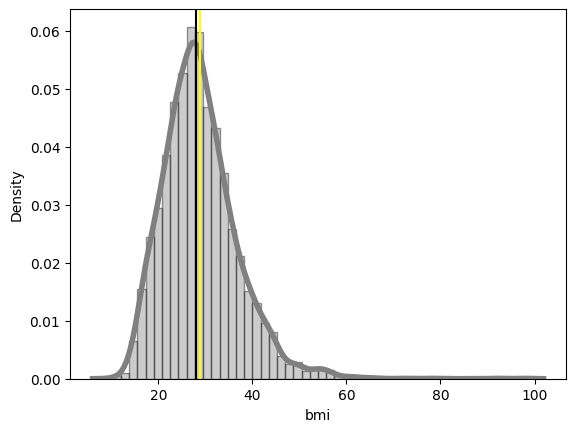

In [ ]:
# Karena ada missing value maka cek histogram utk mengecek median/mean nya
sns.distplot(data['bmi'], hist=True, kde=True,
             color = 'grey',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(data['bmi'].mean(),color='yellow')
plt.axvline(data['bmi'].median(),color='black')

In [ ]:
# Mengganti missing value dengan median
data['bmi'].median()

28.1

In [ ]:
# Imputasi dengan median
data.bmi = data.bmi.fillna(data.bmi.median())

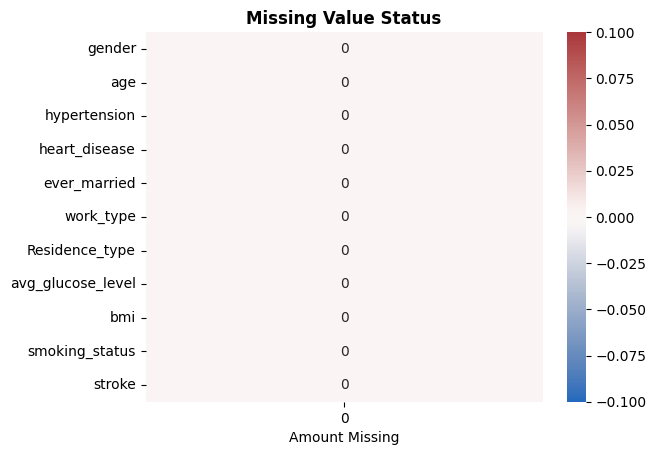

In [ ]:
# cek lagi missing value nya
plt.title('Missing Value Status',fontweight='bold')
ax =sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='vlag')
ax.set_xlabel('Amount Missing')
plt.show()

## Duplicated Value

In [ ]:
# Memeriksa Data Duplikat
print('Jumlah Duplikasi :', data.duplicated().sum())
data.describe()

Jumlah Duplikasi : 0


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.863300,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.699785,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## CHECK OUTLIER PADA DATA NUMERIK


Persebaran data sebelum ditangani Outlier: 
               age  hypertension  avg_glucose_level          bmi       stroke
count  5109.000000   5109.000000        5109.000000  5109.000000  5109.000000
mean     43.229986      0.097475         106.140399    28.863300     0.048738
std      22.613575      0.296633          45.285004     7.699785     0.215340
min       0.080000      0.000000          55.120000    10.300000     0.000000
25%      25.000000      0.000000          77.240000    23.800000     0.000000
50%      45.000000      0.000000          91.880000    28.100000     0.000000
75%      61.000000      0.000000         114.090000    32.800000     0.000000
max      82.000000      1.000000         271.740000    97.600000     1.000000


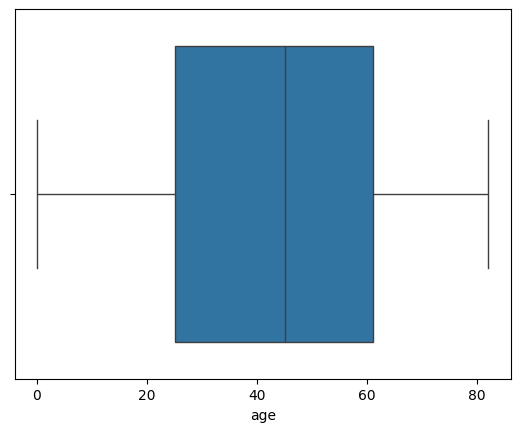

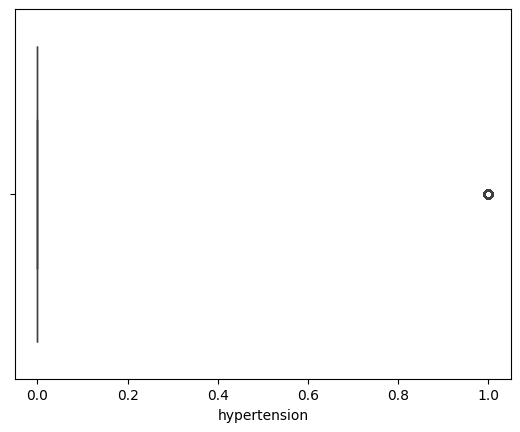

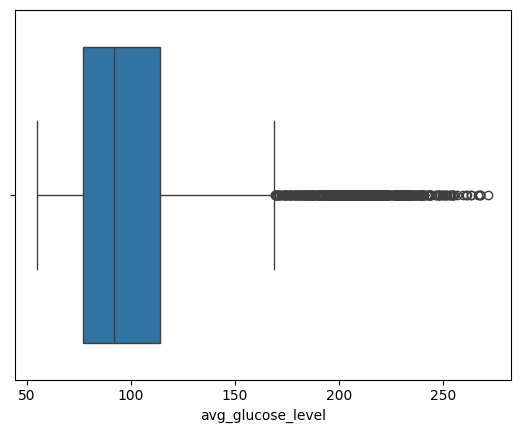

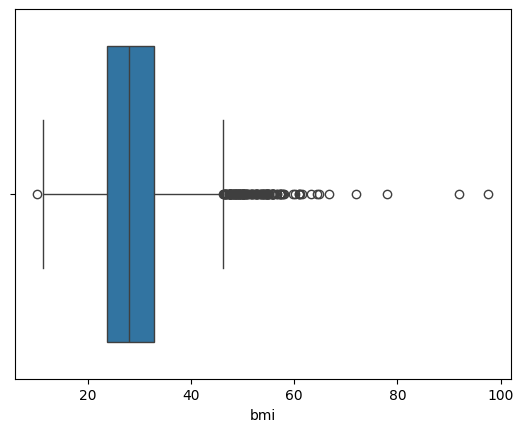

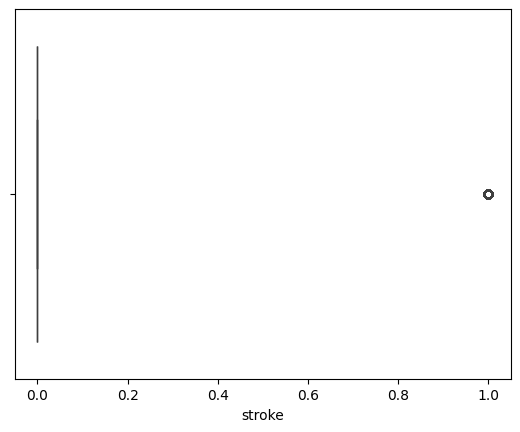

In [ ]:
#Pengecekan Outliers
print('\nPersebaran data sebelum ditangani Outlier: ')
print(data[['age', 'hypertension', 'avg_glucose_level', 'bmi', 'stroke']].describe())
# Creating Box Plot
# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['age'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['hypertension'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['avg_glucose_level'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['bmi'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=data['stroke'])
plt.show()

## Menyimpan Data yang sudah ditangani untuk Visualisasi di RStudio

In [ ]:
data.to_csv('stroke_data_cleaned.csv', index=False)  # Replace 'output.csv' with your desired filename

# **FEATURE SELECTION**

## Label Encoding

In [ ]:
# Using LabelEncoder for all categorical features
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 479.0 KB


## Penentuan Variabel X dan Y

In [ ]:
# MEMISAHKAN ATRIBUT DENGAN LABEL
X = data.drop('stroke', axis=1)
y = data.stroke

In [ ]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2
5106,0,81.0,0,0,1,3,1,125.20,40.0,2
5107,0,35.0,0,0,1,3,0,82.99,30.6,2
5108,1,51.0,0,0,1,2,0,166.29,25.6,1


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5109, dtype: int64

## Recursive Feature Elimination (RFE)

In [ ]:
# Membuat objek RFC d(Random Forest Classifier)
clf_rf_3 = RandomForestClassifier()

# Membuat objek RFE dan feature selection
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(X, y)

In [ ]:
print('Five Chosen Features :', X.columns[rfe.support_])

Five Chosen Features : Index(['age', 'work_type', 'avg_glucose_level', 'bmi', 'smoking_status'], dtype='object')


## ANOVA

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Membuat objek Select dengan f_classif
selector = SelectKBest(score_func=f_classif, k=2)

# Get the selected feature names
X_selected = selector.fit(X, y)

In [ ]:
# Membuat DataFrame dengan features dan scores
feature_scores = pd.DataFrame({'Features': X.columns,
'Score': selector.scores_})

# Mengurutkan features berdasarkan scores
sorted_features = feature_scores.sort_values(by='Score', ascending=False)

# Menampilkan 5 baris teratas dari DataFrame yang sudah diurutkan
top_5_features = sorted_features.head(5)
top_5_features

,Features,Score
1,age,326.799849
3,heart_disease,94.666779
7,avg_glucose_level,90.550026
2,hypertension,84.919947
4,ever_married,60.609558


Perform a classification analysis using at least 2 methods & Perform training-testing:  
repeated holdout and k-fold CV (k=10)

# **MODELING**

In [ ]:
# Fitur teratas dari data asli
selected_features = top_5_features['Features'].values
X_selected = X[selected_features]

## Repeated Holdout

### Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### **Logistic Regression**

#### Definisi Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import matplotlib.pyplot as plt

# Definisi model
models = {
    'Logistic Regression': LogisticRegression()
}

results_repeated_holdout = {}

#### Train dan Evaluasi Model

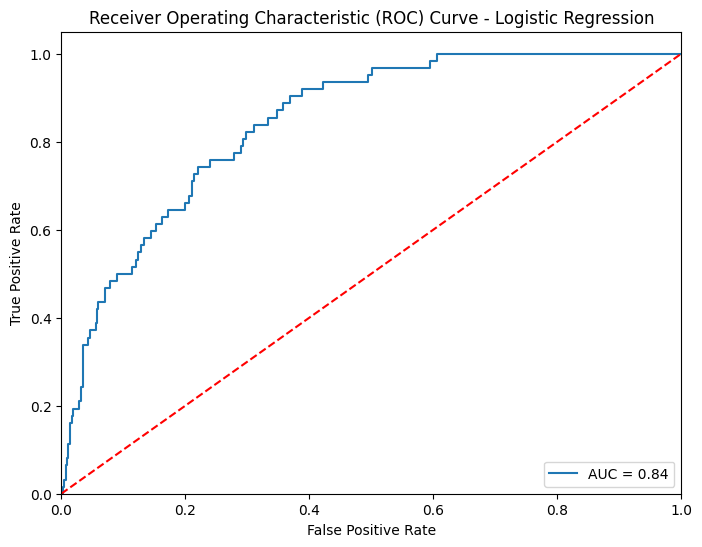

In [ ]:
# Train dan evaluasi model
for nama_model, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)

    # Memprediksi pada set pengujian
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Menghitung metrik evaluasi
    akurasi = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    matriks_konfusi = confusion_matrix(y_test, y_pred)
    laporan_klasifikasi = classification_report(y_test, y_pred)

    # Menghitung sensitivitas dan spesifisitas
    tn, fp, fn, tp = matriks_konfusi.ravel()
    sensitivitas = tp / (tp + fn)
    spesifisitas = tn / (tn + fp)

    # Menyimpan hasil
    results_repeated_holdout[nama_model] = {
        'akurasi': akurasi,
        'roc_auc': roc_auc,
        'sensitivitas': sensitivitas,
        'spesifisitas': spesifisitas,
        'matriks_konfusi': matriks_konfusi,
        'Classification Report': laporan_klasifikasi
    }

    # Untuk kurva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)

    # Plot kurva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {nama_model}')
    plt.legend(loc='lower right')
    plt.show()

#### RESULT

In [ ]:
# Print hasil
for nama_model, hasil in results_repeated_holdout.items():
    print(f"Hasil {nama_model} (Repeated Holdout)")
    print(f"Akurasi: {hasil['akurasi']}")
    print(f"ROC AUC: {hasil['roc_auc']}")
    print(f"Sensitivitas (Recall): {hasil['sensitivitas']}")
    print(f"Spesifisitas: {hasil['spesifisitas']}")
    print(f"Confussion Matrix:\n{hasil['matriks_konfusi']}")
    print(f"Classification Report:\n{hasil['Classification Report']}\n")

Hasil Logistic Regression (Repeated Holdout)
Akurasi: 0.9393346379647749
ROC AUC: 0.8435315860215054
Sensitivitas (Recall): 0.0
Spesifisitas: 1.0
Confussion Matrix:
[[960   0]
 [ 62   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022




### **Random Forest**

#### Definisi Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Definisi model
models = {
    'Random Forest': RandomForestClassifier()
}

results_repeated_holdout = {}

#### Train dan Evaluasi Model

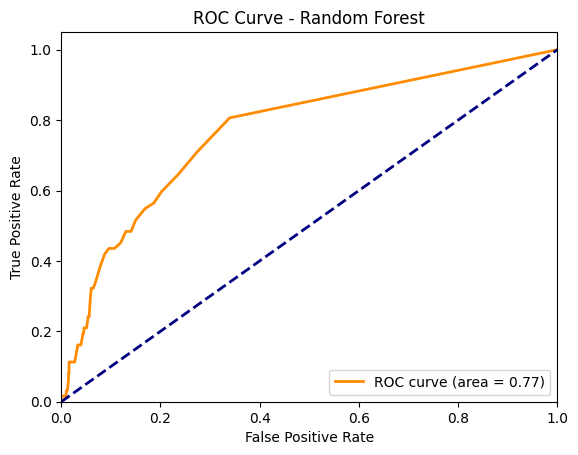

In [ ]:
# Train dan evaluasi model
for nama_model, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)

    # Memprediksi pada set pengujian
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Menghitung metrik evaluasi
    akurasi = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    matriks_konfusi = confusion_matrix(y_test, y_pred)
    laporan_klasifikasi = classification_report(y_test, y_pred)

    # Menghitung sensitivitas dan spesifisitas
    tn, fp, fn, tp = matriks_konfusi.ravel()
    sensitivitas = tp / (tp + fn)
    spesifisitas = tn / (tn + fp)

    # Menyimpan hasil
    results_repeated_holdout[nama_model] = {
        'akurasi': akurasi,
        'roc_auc': roc_auc,
        'sensitivitas': sensitivitas,
        'spesifisitas': spesifisitas,
        'matriks_konfusi': matriks_konfusi,
        'Classification Report': laporan_klasifikasi
    }

    # Untuk kurva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc_val = auc(fpr, tpr)

    # Plot kurva ROC
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_val)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {nama_model}')
    plt.legend(loc="lower right")
    plt.show()

#### RESULT

In [ ]:
# Print hasil
for nama_model, hasil in results_repeated_holdout.items():
    print(f"Hasil {nama_model} (Repeated Holdout)")
    print(f"Akurasi: {hasil['akurasi']}")
    print(f"ROC AUC: {hasil['roc_auc']}")
    print(f"Sensitivitas (Recall): {hasil['sensitivitas']}")
    print(f"Spesifisitas: {hasil['spesifisitas']}")
    print(f"Confussion MatriX:\n{hasil['matriks_konfusi']}")
    print(f"Classification Report:\n{hasil['Classification Report']}\n")

Hasil Random Forest (Repeated Holdout)
Akurasi: 0.9315068493150684
ROC AUC: 0.7687584005376343
Sensitivitas (Recall): 0.03225806451612903
Spesifisitas: 0.9895833333333334
Confussion MatriX:
[[950  10]
 [ 60   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.17      0.03      0.05        62

    accuracy                           0.93      1022
   macro avg       0.55      0.51      0.51      1022
weighted avg       0.89      0.93      0.91      1022




### **Naive Bayes**

#### Definisi Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Definisi model
models = {
    'Naive Bayes': GaussianNB()
}

results_repeated_holdout = {}

#### Train dan Evaluasi Model

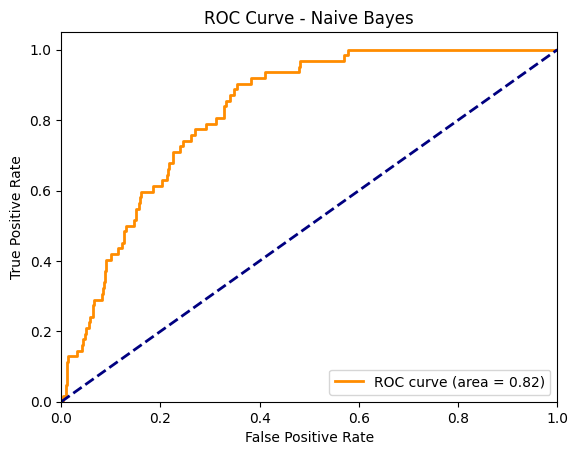

In [ ]:
# Train dan evaluasi model
for nama_model, model in models.items():
    # Melatih model
    model.fit(X_train, y_train)

    # Memprediksi pada set pengujian
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Menghitung metrik evaluasi
    akurasi = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    matriks_konfusi = confusion_matrix(y_test, y_pred)
    laporan_klasifikasi = classification_report(y_test, y_pred)

    # Menghitung sensitivitas dan spesifisitas
    tn, fp, fn, tp = matriks_konfusi.ravel()
    sensitivitas = tp / (tp + fn)
    spesifisitas = tn / (tn + fp)

    # Menyimpan hasil
    results_repeated_holdout[nama_model] = {
        'akurasi': akurasi,
        'roc_auc': roc_auc,
        'sensitivitas': sensitivitas,
        'spesifisitas': spesifisitas,
        'matriks_konfusi': matriks_konfusi,
        'Classification Report': laporan_klasifikasi
    }

    # Untuk kurva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc_val = auc(fpr, tpr)

    # Plot kurva ROC
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_val)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {nama_model}')
    plt.legend(loc="lower right")
    plt.show()

#### RESULT

In [ ]:
# Print hasil
for nama_model, hasil in results_repeated_holdout.items():
    print(f"Hasil {nama_model} (Repeated Holdout)")
    print(f"Akurasi: {hasil['akurasi']}")
    print(f"ROC AUC: {hasil['roc_auc']}")
    print(f"Sensitivitas (Recall): {hasil['sensitivitas']}")
    print(f"Spesifisitas: {hasil['spesifisitas']}")
    print(f"Confussion Matrix:\n{hasil['matriks_konfusi']}")
    print(f"Classification Report:\n{hasil['Classification Report']}\n")

Hasil Naive Bayes (Repeated Holdout)
Akurasi: 0.8532289628180039
ROC AUC: 0.8242271505376344
Sensitivitas (Recall): 0.43548387096774194
Spesifisitas: 0.8802083333333334
Confussion Matrix:
[[845 115]
 [ 35  27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       960
           1       0.19      0.44      0.26        62

    accuracy                           0.85      1022
   macro avg       0.58      0.66      0.59      1022
weighted avg       0.91      0.85      0.88      1022




## K-Fold Cross Validation k=5

In [ ]:
kfold5 = KFold(n_splits=5, shuffle=True, random_state=42)

### **Logistic Regression**

#### Definisi Model

In [ ]:
# Definisi model
models = {
    'Logistic Regression': LogisticRegression()
}

results_kfold5 = {}

#### Train dan Evaluasi Model

In [ ]:
# Train dan evaluasi model
for model_name, model in models.items():
    accuracy_scores_cv = []
    roc_auc_scores_cv = []
    sensitivity_scores_cv = []
    specificity_scores_cv = []
    confusion_matrices_cv = []
    classification_reports_cv = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)

    # Memisahkan data ke dalam set pelatihan dan pengujian untuk setiap lipatan
    for train_index, test_index in kfold5.split(X_selected):
        X_train_fold, X_test_fold = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Melatih model pada lipatan saat ini
        model.fit(X_train_fold, y_train_fold)

        # Memprediksi pada set pengujian dari lipatan saat ini
        y_pred_fold = model.predict(X_test_fold)
        y_prob_fold = model.predict_proba(X_test_fold)[:, 1]

        # Menghitung metrik evaluasi untuk lipatan saat ini
        accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
        roc_auc_fold = roc_auc_score(y_test_fold, y_prob_fold)
        confusion_matrix_fold = confusion_matrix(y_test_fold, y_pred_fold)
        classification_report_fold = classification_report(y_test_fold, y_pred_fold)

        # Menghitung sensitivity dan specificity
        tn, fp, fn, tp = confusion_matrix_fold.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        # Menghitung ROC curve
        fpr, tpr, thresholds = roc_curve(y_test_fold, y_prob_fold)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

        # Menyimpan skor dan metrik ke dalam list
        accuracy_scores_cv.append(accuracy_fold)
        roc_auc_scores_cv.append(roc_auc_fold)
        sensitivity_scores_cv.append(sensitivity)
        specificity_scores_cv.append(specificity)
        confusion_matrices_cv.append(confusion_matrix_fold)
        classification_reports_cv.append(classification_report_fold)

    # Menghitung rata-rata skor dan metrik evaluasi dari semua lipatan
    mean_accuracy = np.mean(accuracy_scores_cv)
    mean_roc_auc = np.mean(roc_auc_scores_cv)
    mean_sensitivity = np.mean(sensitivity_scores_cv)
    mean_specificity = np.mean(specificity_scores_cv)
    mean_confusion_matrix = np.mean(confusion_matrices_cv, axis=0)
    mean_classification_report = "\n\n".join(classification_reports_cv)
    mean_tpr = np.mean(tprs, axis=0)

    # Menyimpan hasil
    results_kfold5[model_name] = {
        'mean_accuracy': mean_accuracy,
        'mean_roc_auc': mean_roc_auc,
        'mean_sensitivity': mean_sensitivity,
        'mean_specificity': mean_specificity,
        'mean_confusion_matrix': mean_confusion_matrix,
        'mean_classification_report': mean_classification_report,
        'mean_tpr': mean_tpr,
        'mean_fpr': mean_fpr
    }

#### RESULT

Results for Logistic Regression (K-Fold CV)
Mean Accuracy: 0.9512637738604759
Mean ROC AUC: 0.8428777373376951
Mean Sensitivity (Recall): 0.0
Mean Specificity: 1.0
Mean Confusion Matrix:
[[972.    0. ]
 [ 49.8   0. ]]
Mean Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       970
           1       0.00      0.00      0.00        52

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022


              precision    recall  f1-score   support

           0       0.96      1.00      0.98

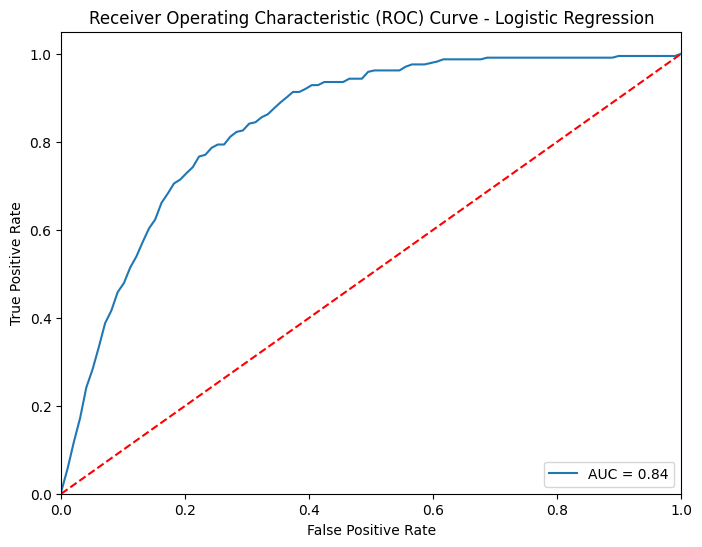

In [ ]:
# Print hasil
for model_name, results in results_kfold5.items():
    print(f"Results for {model_name} (K-Fold CV)")
    print(f"Mean Accuracy: {results['mean_accuracy']}")
    print(f"Mean ROC AUC: {results['mean_roc_auc']}")
    print(f"Mean Sensitivity (Recall): {results['mean_sensitivity']}")
    print(f"Mean Specificity: {results['mean_specificity']}")
    print(f"Mean Confusion Matrix:\n{results['mean_confusion_matrix']}")
    print(f"Mean Classification Report:\n{results['mean_classification_report']}\n")

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(results['mean_fpr'], results['mean_tpr'], label=f'AUC = {results["mean_roc_auc"]:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

### **Random Forest**

#### Definisi Model

In [ ]:
# Definisi model
models = {
    'Random Forest': RandomForestClassifier()
}

results_kfold5 = {}

#### Training dan Evaluasi Model

In [ ]:
# Train dan evaluasi model
for model_name, model in models.items():
    accuracy_scores_cv = []
    roc_auc_scores_cv = []
    sensitivity_scores_cv = []
    specificity_scores_cv = []
    confusion_matrices_cv = []
    classification_reports_cv = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)

    # Memisahkan data ke dalam set pelatihan dan pengujian untuk setiap lipatan
    for train_index, test_index in kfold5.split(X_selected):
        X_train_fold, X_test_fold = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Melatih model pada lipatan saat ini
        model.fit(X_train_fold, y_train_fold)

        # Memprediksi pada set pengujian dari lipatan saat ini
        y_pred_fold = model.predict(X_test_fold)
        y_prob_fold = model.predict_proba(X_test_fold)[:, 1]

        # Menghitung metrik evaluasi untuk lipatan saat ini
        accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
        roc_auc_fold = roc_auc_score(y_test_fold, y_prob_fold)
        confusion_matrix_fold = confusion_matrix(y_test_fold, y_pred_fold)
        classification_report_fold = classification_report(y_test_fold, y_pred_fold)

        # Menghitung sensitivity dan specificity
        tn, fp, fn, tp = confusion_matrix_fold.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        # Menghitung ROC curve
        fpr, tpr, thresholds = roc_curve(y_test_fold, y_prob_fold)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

        # Menyimpan skor dan metrik ke dalam list
        accuracy_scores_cv.append(accuracy_fold)
        roc_auc_scores_cv.append(roc_auc_fold)
        sensitivity_scores_cv.append(sensitivity)
        specificity_scores_cv.append(specificity)
        confusion_matrices_cv.append(confusion_matrix_fold)
        classification_reports_cv.append(classification_report_fold)

    # Menghitung rata-rata skor dan metrik evaluasi dari semua lipatan
    mean_accuracy = np.mean(accuracy_scores_cv)
    mean_roc_auc = np.mean(roc_auc_scores_cv)
    mean_sensitivity = np.mean(sensitivity_scores_cv)
    mean_specificity = np.mean(specificity_scores_cv)
    mean_confusion_matrix = np.mean(confusion_matrices_cv, axis=0)
    mean_classification_report = "\n\n".join(classification_reports_cv)
    mean_tpr = np.mean(tprs, axis=0)

    # Menyimpan hasil
    results_kfold5[model_name] = {
        'mean_accuracy': mean_accuracy,
        'mean_roc_auc': mean_roc_auc,
        'mean_sensitivity': mean_sensitivity,
        'mean_specificity': mean_specificity,
        'mean_confusion_matrix': mean_confusion_matrix,
        'mean_classification_report': mean_classification_report,
        'mean_tpr': mean_tpr,
        'mean_fpr': mean_fpr
    }

#### RESULT

Results for Random Forest (K-Fold CV)
Mean Accuracy: 0.9389328983709996
Mean ROC AUC: 0.7496819565522393
Mean Sensitivity (Recall): 0.038758292621050766
Mean Specificity: 0.985198888840053
Mean Confusion Matrix:
[[957.6  14.4]
 [ 48.    1.8]]
Mean Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       960
           1       0.17      0.03      0.05        62

    accuracy                           0.93      1022
   macro avg       0.55      0.51      0.51      1022
weighted avg       0.89      0.93      0.91      1022


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       970
           1       0.05      0.02      0.03        52

    accuracy                           0.93      1022
   macro avg       0.50      0.50      0.50      1022
weighted avg       0.90      0.93      0.92      1022


              precision    recall  f1-score   support

           0      

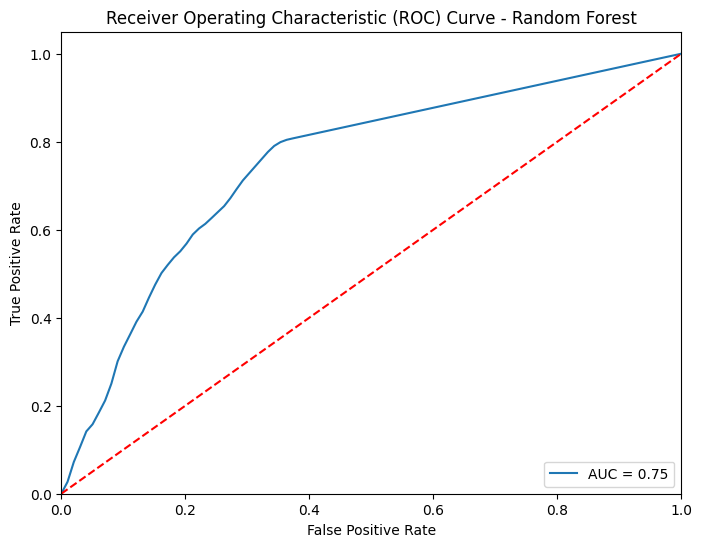

In [ ]:
# Print hasil
for model_name, results in results_kfold5.items():
    print(f"Results for {model_name} (K-Fold CV)")
    print(f"Mean Accuracy: {results['mean_accuracy']}")
    print(f"Mean ROC AUC: {results['mean_roc_auc']}")
    print(f"Mean Sensitivity (Recall): {results['mean_sensitivity']}")
    print(f"Mean Specificity: {results['mean_specificity']}")
    print(f"Mean Confusion Matrix:\n{results['mean_confusion_matrix']}")
    print(f"Mean Classification Report:\n{results['mean_classification_report']}\n")

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(results['mean_fpr'], results['mean_tpr'], label=f'AUC = {results["mean_roc_auc"]:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

### **Naive Bayes**

#### Definisi Model

In [ ]:
# Definisi model
models = {
    'Naive Bayes': GaussianNB()
}

results_kfold5 = {}

#### Training dan Evaluasi Model

In [ ]:
# Train dan evaluasi model
for model_name, model in models.items():
    accuracy_scores_cv = []
    roc_auc_scores_cv = []
    sensitivity_scores_cv = []
    specificity_scores_cv = []
    confusion_matrices_cv = []
    classification_reports_cv = []
    tprs = []
    mean_fpr = np.linspace(0, 1, 100)

    # Memisahkan data ke dalam set pelatihan dan pengujian untuk setiap lipatan
    for train_index, test_index in kfold5.split(X_selected):
        X_train_fold, X_test_fold = X_selected.iloc[train_index], X_selected.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Melatih model pada lipatan saat ini
        model.fit(X_train_fold, y_train_fold)

        # Memprediksi pada set pengujian dari lipatan saat ini
        y_pred_fold = model.predict(X_test_fold)
        y_prob_fold = model.predict_proba(X_test_fold)[:, 1]

        # Menghitung metrik evaluasi untuk lipatan saat ini
        accuracy_fold = accuracy_score(y_test_fold, y_pred_fold)
        roc_auc_fold = roc_auc_score(y_test_fold, y_prob_fold)
        confusion_matrix_fold = confusion_matrix(y_test_fold, y_pred_fold)
        classification_report_fold = classification_report(y_test_fold, y_pred_fold)

        # Menghitung sensitivity dan specificity
        tn, fp, fn, tp = confusion_matrix_fold.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        # Menghitung ROC curve
        fpr, tpr, thresholds = roc_curve(y_test_fold, y_prob_fold)
        tprs.append(np.interp(mean_fpr, fpr, tpr))

        # Menyimpan skor dan metrik ke dalam list
        accuracy_scores_cv.append(accuracy_fold)
        roc_auc_scores_cv.append(roc_auc_fold)
        sensitivity_scores_cv.append(sensitivity)
        specificity_scores_cv.append(specificity)
        confusion_matrices_cv.append(confusion_matrix_fold)
        classification_reports_cv.append(classification_report_fold)

    # Menghitung rata-rata skor dan metrik evaluasi dari semua lipatan
    mean_accuracy = np.mean(accuracy_scores_cv)
    mean_roc_auc = np.mean(roc_auc_scores_cv)
    mean_sensitivity = np.mean(sensitivity_scores_cv)
    mean_specificity = np.mean(specificity_scores_cv)
    mean_confusion_matrix = np.mean(confusion_matrices_cv, axis=0)
    mean_classification_report = "\n\n".join(classification_reports_cv)
    mean_tpr = np.mean(tprs, axis=0)

    # Menyimpan hasil
    results_kfold5[model_name] = {
        'mean_accuracy': mean_accuracy,
        'mean_roc_auc': mean_roc_auc,
        'mean_sensitivity': mean_sensitivity,
        'mean_specificity': mean_specificity,
        'mean_confusion_matrix': mean_confusion_matrix,
        'mean_classification_report': mean_classification_report,
        'mean_tpr': mean_tpr,
        'mean_fpr': mean_fpr
    }

#### RESULT

Results for Naive Bayes (K-Fold CV)
Mean Accuracy: 0.867881532820553
Mean ROC AUC: 0.8114699939623975
Mean Sensitivity (Recall): 0.38145833628218384
Mean Specificity: 0.8925036593306477
Mean Confusion Matrix:
[[867.6 104.4]
 [ 30.6  19.2]]
Mean Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       960
           1       0.19      0.44      0.26        62

    accuracy                           0.85      1022
   macro avg       0.58      0.66      0.59      1022
weighted avg       0.91      0.85      0.88      1022


              precision    recall  f1-score   support

           0       0.96      0.89      0.93       970
           1       0.15      0.37      0.22        52

    accuracy                           0.86      1022
   macro avg       0.56      0.63      0.57      1022
weighted avg       0.92      0.86      0.89      1022


              precision    recall  f1-score   support

           0       0.

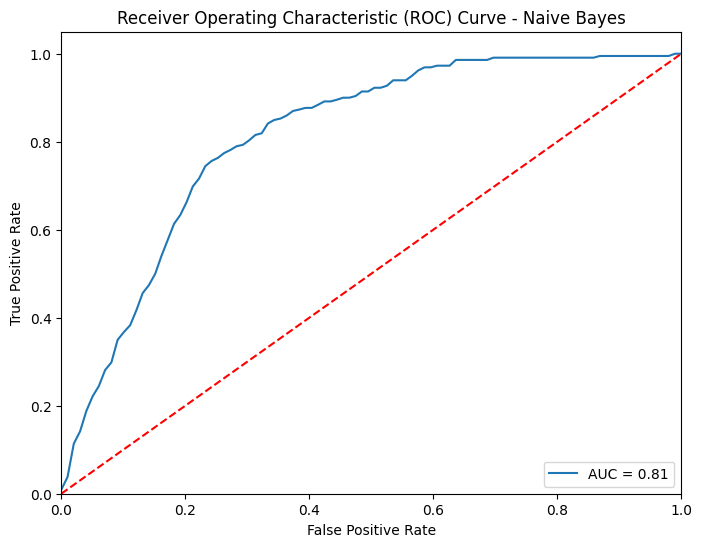

In [ ]:
# Print hasil
for model_name, results in results_kfold5.items():
    print(f"Results for {model_name} (K-Fold CV)")
    print(f"Mean Accuracy: {results['mean_accuracy']}")
    print(f"Mean ROC AUC: {results['mean_roc_auc']}")
    print(f"Mean Sensitivity (Recall): {results['mean_sensitivity']}")
    print(f"Mean Specificity: {results['mean_specificity']}")
    print(f"Mean Confusion Matrix:\n{results['mean_confusion_matrix']}")
    print(f"Mean Classification Report:\n{results['mean_classification_report']}\n")

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(results['mean_fpr'], results['mean_tpr'], label=f'AUC = {results["mean_roc_auc"]:.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

## K-Fold Cross Validation k=10

In [ ]:
kfold10 = KFold(n_splits=10, shuffle=True, random_state=42)

### **Logistic Regression**

#### Definisi Model

In [ ]:
model_lr = LogisticRegression()

results_kfold10_lr = {}

#### Train dan Evaluasi Model

In [ ]:
skor_akurasi_cv = []
skor_roc_auc_cv = []
skor_sensitivitas_cv = []
skor_spesifisitas_cv = []
matriks_konfusi_cv = []
laporan_klasifikasi_cv = []

# Memisahkan data ke dalam set pelatihan dan pengujian untuk setiap lipatan
for indeks_latih, indeks_uji in kfold10.split(X_selected):
    X_latih_fold, X_uji_fold = X_selected.iloc[indeks_latih], X_selected.iloc[indeks_uji]
    y_latih_fold, y_uji_fold = y.iloc[indeks_latih], y.iloc[indeks_uji]

    # Melatih model pada lipatan saat ini
    model_lr.fit(X_latih_fold, y_latih_fold)

    # Memprediksi pada set pengujian dari lipatan saat ini
    y_pred_fold = model_lr.predict(X_uji_fold)
    y_pred_proba_fold = model_lr.predict_proba(X_uji_fold)[:, 1]

    # Menghitung metrik evaluasi untuk lipatan saat ini
    skor_akurasi_fold = accuracy_score(y_uji_fold, y_pred_fold)
    skor_roc_auc_fold = roc_auc_score(y_uji_fold, y_pred_proba_fold)
    matriks_konfusi_fold = confusion_matrix(y_uji_fold, y_pred_fold)
    laporan_klasifikasi_fold = classification_report(y_uji_fold, y_pred_fold)

    # Menghitung sensitivitas dan spesifisitas
    tn, fp, fn, tp = matriks_konfusi_fold.ravel()
    sensitivitas = tp / (tp + fn)
    spesifisitas = tn / (tn + fp)

    # Menyimpan skor dan metrik ke dalam list
    skor_akurasi_cv.append(skor_akurasi_fold)
    skor_roc_auc_cv.append(skor_roc_auc_fold)
    skor_sensitivitas_cv.append(sensitivitas)
    skor_spesifisitas_cv.append(spesifisitas)
    matriks_konfusi_cv.append(matriks_konfusi_fold)
    laporan_klasifikasi_cv.append(laporan_klasifikasi_fold)

# Menghitung rata-rata skor dan metrik evaluasi dari semua lipatan
rata_rata_akurasi = np.mean(skor_akurasi_cv)
rata_rata_roc_auc = np.mean(skor_roc_auc_cv)
rata_rata_sensitivitas = np.mean(skor_sensitivitas_cv)
rata_rata_spesifisitas = np.mean(skor_spesifisitas_cv)
rata_rata_matriks_konfusi = np.mean(matriks_konfusi_cv, axis=0)
rata_rata_laporan_klasifikasi = "\n\n".join(laporan_klasifikasi_cv)

# Menyimpan hasil
results_kfold10_lr['Logistic Regression'] = {
    'rata_rata_accuracy': rata_rata_akurasi,
    'rata_rata_roc_auc': rata_rata_roc_auc,
    'rata_rata_sensitivity': rata_rata_sensitivitas,
    'rata_rata_specificity': rata_rata_spesifisitas,
    'rata_rata_confusion_matrix': rata_rata_matriks_konfusi,
    'rata_rata_Classification Report': rata_rata_laporan_klasifikasi
}

#### RESULT

In [ ]:
for nama_model, hasil in results_kfold10_lr.items():
    print(f"### Hasil {nama_model} (K-Fold CV) ###")
    print(f"Rata-rata Accuracy: {hasil['rata_rata_accuracy']}")
    print(f"Rata-rata ROC AUC: {hasil['rata_rata_roc_auc']}")
    print(f"Rata-rata Sensitivity: {hasil['rata_rata_sensitivity']}")
    print(f"Rata-rata Specificity: {hasil['rata_rata_specificity']}")
    print(f"Rata-rata Confusion Matrix:\n{hasil['rata_rata_confusion_matrix']}")
    print(f"Rata-rata Classification Report:\n{hasil['rata_rata_Classification Report']}\n")

### Hasil Logistic Regression (K-Fold CV) ###
Rata-rata Accuracy: 0.9512631902075898
Rata-rata ROC AUC: 0.8427839975958327
Rata-rata Sensitivity: 0.0
Rata-rata Specificity: 1.0
Rata-rata Confusion Matrix:
[[486.    0. ]
 [ 24.9   0. ]]
Rata-rata Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       483
           1       0.00      0.00      0.00        28

    accuracy                           0.95       511
   macro avg       0.47      0.50      0.49       511
weighted avg       0.89      0.95      0.92       511


              precision    recall  f1-score   support

           0       0.93      1.00      0.97       477
           1       0.00      0.00      0.00        34

    accuracy                           0.93       511
   macro avg       0.47      0.50      0.48       511
weighted avg       0.87      0.93      0.90       511


              precision    recall  f1-score   support

           0       0

### **Random Forest**

#### Definisi Model

In [ ]:
model_rf = RandomForestClassifier(random_state=42)

results_kfold10_rf = {}

#### Training dan Evaluasi Model

In [ ]:
skor_akurasi_cv = []
skor_roc_auc_cv = []
skor_sensitivitas_cv = []
skor_spesifisitas_cv = []
matriks_konfusi_cv = []
laporan_klasifikasi_cv = []

# Memisahkan data ke dalam set pelatihan dan pengujian untuk setiap lipatan
for indeks_latih, indeks_uji in kfold10.split(X_selected):
    X_latih_fold, X_uji_fold = X_selected.iloc[indeks_latih], X_selected.iloc[indeks_uji]
    y_latih_fold, y_uji_fold = y.iloc[indeks_latih], y.iloc[indeks_uji]

    # Melatih model pada lipatan saat ini
    model_rf.fit(X_latih_fold, y_latih_fold)

    # Memprediksi pada set pengujian dari lipatan saat ini
    y_pred_fold = model_rf.predict(X_uji_fold)
    y_pred_proba_fold = model_rf.predict_proba(X_uji_fold)[:, 1]

    # Menghitung metrik evaluasi untuk lipatan saat ini
    skor_akurasi_fold = accuracy_score(y_uji_fold, y_pred_fold)
    skor_roc_auc_fold = roc_auc_score(y_uji_fold, y_pred_proba_fold)
    matriks_konfusi_fold = confusion_matrix(y_uji_fold, y_pred_fold)
    laporan_klasifikasi_fold = classification_report(y_uji_fold, y_pred_fold)

    # Menghitung sensitivitas dan spesifisitas
    tn, fp, fn, tp = matriks_konfusi_fold.ravel()
    sensitivitas = tp / (tp + fn)
    spesifisitas = tn / (tn + fp)

    # Menyimpan skor dan metrik ke dalam list
    skor_akurasi_cv.append(skor_akurasi_fold)
    skor_roc_auc_cv.append(skor_roc_auc_fold)
    skor_sensitivitas_cv.append(sensitivitas)
    skor_spesifisitas_cv.append(spesifisitas)
    matriks_konfusi_cv.append(matriks_konfusi_fold)
    laporan_klasifikasi_cv.append(laporan_klasifikasi_fold)

# Menghitung rata-rata skor dan metrik evaluasi dari semua lipatan
rata_rata_akurasi = np.mean(skor_akurasi_cv)
rata_rata_roc_auc = np.mean(skor_roc_auc_cv)
rata_rata_sensitivitas = np.mean(skor_sensitivitas_cv)
rata_rata_spesifisitas = np.mean(skor_spesifisitas_cv)
rata_rata_matriks_konfusi = np.mean(matriks_konfusi_cv, axis=0)
rata_rata_laporan_klasifikasi = "\n\n".join(laporan_klasifikasi_cv)

# Menyimpan hasil
results_kfold10_rf['Random Forest'] = {
    'rata_rata_accuracy': rata_rata_akurasi,
    'rata_rata_roc_auc': rata_rata_roc_auc,
    'rata_rata_sensitivity': rata_rata_sensitivitas,
    'rata_rata_specificity': rata_rata_spesifisitas,
    'rata_rata_confusion_matrix': rata_rata_matriks_konfusi,
    'rata_rata_Classification Report': rata_rata_laporan_klasifikasi
}

#### RESULT

In [ ]:
for nama_model, hasil in results_kfold10_rf.items():
    print(f"### Hasil {nama_model} (K-Fold CV) ###")
    print(f"Rata-rata Accuracy: {hasil['rata_rata_accuracy']}")
    print(f"Rata-rata ROC AUC: {hasil['rata_rata_roc_auc']}")
    print(f"Rata-rata Sensitivity: {hasil['rata_rata_sensitivity']}")
    print(f"Rata-rata Specificity: {hasil['rata_rata_specificity']}")
    print(f"Rata-rata Confusion Matrix:\n{hasil['rata_rata_confusion_matrix']}")
    print(f"Rata-rata Classification Report:\n{hasil['rata_rata_Classification Report']}\n")

### Hasil Random Forest (K-Fold CV) ###
Rata-rata Accuracy: 0.9387375772226699
Rata-rata ROC AUC: 0.7386706989112393
Rata-rata Sensitivity: 0.06998352481089054
Rata-rata Specificity: 0.9838115166846005
Rata-rata Confusion Matrix:
[[478.1   7.9]
 [ 23.4   1.5]]
Rata-rata Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       483
           1       0.14      0.04      0.06        28

    accuracy                           0.94       511
   macro avg       0.54      0.51      0.51       511
weighted avg       0.90      0.94      0.92       511


              precision    recall  f1-score   support

           0       0.94      0.99      0.96       477
           1       0.43      0.09      0.15        34

    accuracy                           0.93       511
   macro avg       0.68      0.54      0.56       511
weighted avg       0.90      0.93      0.91       511


              precision    recall  f1-score   supp

### **Naive Bayes**

#### Definisi Model

In [ ]:
model_nb = GaussianNB()

results_kfold10_nb = {}

#### Training dan Evaluasi Model

In [ ]:
# Train dan evaluasi model
skor_akurasi_cv = []
skor_roc_auc_cv = []
skor_sensitivitas_cv = []
skor_spesifisitas_cv = []
matriks_konfusi_cv = []
laporan_klasifikasi_cv = []

# Memisahkan data ke dalam set pelatihan dan pengujian untuk setiap lipatan
for indeks_latih, indeks_uji in kfold10.split(X_selected):
    X_latih_fold, X_uji_fold = X_selected.iloc[indeks_latih], X_selected.iloc[indeks_uji]
    y_latih_fold, y_uji_fold = y.iloc[indeks_latih], y.iloc[indeks_uji]

    # Melatih model pada lipatan saat ini
    model_nb.fit(X_latih_fold, y_latih_fold)

    # Memprediksi pada set pengujian dari lipatan saat ini
    y_pred_fold = model_nb.predict(X_uji_fold)
    y_pred_proba_fold = model_nb.predict_proba(X_uji_fold)[:, 1]

    # Menghitung metrik evaluasi untuk lipatan saat ini
    skor_akurasi_fold = accuracy_score(y_uji_fold, y_pred_fold)
    skor_roc_auc_fold = roc_auc_score(y_uji_fold, y_pred_proba_fold)
    matriks_konfusi_fold = confusion_matrix(y_uji_fold, y_pred_fold)
    laporan_klasifikasi_fold = classification_report(y_uji_fold, y_pred_fold)

    # Menghitung sensitivitas dan spesifisitas
    tn, fp, fn, tp = matriks_konfusi_fold.ravel()
    sensitivitas = tp / (tp + fn)
    spesifisitas = tn / (tn + fp)

    # Menyimpan skor dan metrik ke dalam list
    skor_akurasi_cv.append(skor_akurasi_fold)
    skor_roc_auc_cv.append(skor_roc_auc_fold)
    skor_sensitivitas_cv.append(sensitivitas)
    skor_spesifisitas_cv.append(spesifisitas)
    matriks_konfusi_cv.append(matriks_konfusi_fold)
    laporan_klasifikasi_cv.append(laporan_klasifikasi_fold)

# Menghitung rata-rata skor dan metrik evaluasi dari semua lipatan
rata_rata_akurasi = np.mean(skor_akurasi_cv)
rata_rata_roc_auc = np.mean(skor_roc_auc_cv)
rata_rata_sensitivitas = np.mean(skor_sensitivitas_cv)
rata_rata_spesifisitas = np.mean(skor_spesifisitas_cv)
rata_rata_matriks_konfusi = np.mean(matriks_konfusi_cv, axis=0)
rata_rata_laporan_klasifikasi = "\n\n".join(laporan_klasifikasi_cv)

# Menyimpan hasil
results_kfold10_nb['Naive Bayes'] = {
    'rata_rata_accuracy': rata_rata_akurasi,
    'rata_rata_roc_auc': rata_rata_roc_auc,
    'rata_rata_sensitivity': rata_rata_sensitivitas,
    'rata_rata_specificity': rata_rata_spesifisitas,
    'rata_rata_confusion_matrix': rata_rata_matriks_konfusi,
    'rata_rata_Classification Report': rata_rata_laporan_klasifikasi
}

#### RESULT

In [ ]:
for nama_model, hasil in results_kfold10_nb.items():
    print(f"### Hasil {nama_model} (K-Fold CV) ###")
    print(f"Rata-rata Accuracy: {hasil['rata_rata_accuracy']}")
    print(f"Rata-rata ROC AUC: {hasil['rata_rata_roc_auc']}")
    print(f"Rata-rata Sensitivity: {hasil['rata_rata_sensitivity']}")
    print(f"Rata-rata Specificity: {hasil['rata_rata_specificity']}")
    print(f"Rata-rata Confusion Matrix:\n{hasil['rata_rata_confusion_matrix']}")
    print(f"Rata-rata Classification Report:\n{hasil['rata_rata_Classification Report']}\n")

### Hasil Naive Bayes (K-Fold CV) ###
Rata-rata Accuracy: 0.8682736656306359
Rata-rata ROC AUC: 0.8091757966761872
Rata-rata Sensitivity: 0.3684949907059881
Rata-rata Specificity: 0.8928763664796033
Rata-rata Confusion Matrix:
[[434.   52. ]
 [ 15.3   9.6]]
Rata-rata Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       483
           1       0.12      0.29      0.17        28

    accuracy                           0.85       511
   macro avg       0.54      0.58      0.54       511
weighted avg       0.91      0.85      0.88       511


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       477
           1       0.24      0.56      0.34        34

    accuracy                           0.86       511
   macro avg       0.60      0.72      0.63       511
weighted avg       0.92      0.86      0.88       511


              precision    recall  f1-score   support